# Day 1 - Afternoon

# 1. Data Cleaning and Data Encoding

## 1.1 Introduction to Data Cleaning

Data cleaning, also known as data cleansing or data scrubbing, refers to the process of identifying and correcting or removing errors, inconsistencies, and inaccuracies in a dataset. It is an essential step in data preprocessing and analysis to ensure that the data is accurate, reliable, and suitable for further analysis or modeling.

Data cleaning is important because real-world data is often imperfect. It can contain various issues such as missing values, duplicate records, incorrect formatting, inconsistent spellings, outliers, and more. These problems can arise due to human errors during data entry, technical glitches, or the integration of data from different sources.

The primary objectives of data cleaning are as follows:

1. **Removing or correcting errors:** Data cleaning involves identifying and addressing errors in the dataset. For example, it may involve fixing typos, resolving inconsistent date formats, or rectifying inaccurate numerical entries.


2. **Handling missing data:** Missing data refers to the absence of values in certain records or attributes. Data cleaning techniques help in dealing with missing data, which may involve imputing missing values based on statistical methods or removing records with excessive missing data.


3. **Handling duplicates:** Duplicates are identical or near-identical records that exist within a dataset. Data cleaning aims to identify and remove or merge duplicate records, ensuring that each unique entity is represented only once.


4. **Standardizing and transforming data:** Inconsistent formatting, units, or scales can hinder data analysis. Data cleaning involves standardizing variables, converting units, and transforming data to ensure consistency and compatibility across the dataset.


5. **Handling outliers:** Outliers are extreme values that deviate significantly from the typical pattern of the data. Data cleaning techniques help in identifying and dealing with outliers, which may involve removing them if they are due to data entry errors or handling them separately if they represent important observations.


Data cleaning is typically performed using a combination of manual and automated techniques. It requires domain knowledge, data exploration, and the use of various data cleaning tools and algorithms.

By performing effective data cleaning, analysts and data scientists can improve the quality of the data and enhance the accuracy and reliability of their subsequent analyses, predictive models, or decision-making processes.

## 1.2 Preparation

### 1.2.1 Import Libraries

In [66]:
pip install category_encoders


[notice] A new release of pip available: 22.3 -> 23.2.1
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [67]:
import pandas as pd
import numpy as np
import warnings

# Ignore all warnings
warnings.filterwarnings("ignore")

In [68]:
!git clone https://github.com/MLcmore2023/MLcmore2023.git

fatal: destination path 'MLcmore2023' already exists and is not an empty directory.


In [69]:
!mv ./MLcmore2023/'day1_pm_afternoon'/* ./MLcmore2023/'day1_pm_afternoon'/.* ./

zsh:1: no matches found: ./MLcmore2023/day1_pm_afternoon/*


In [70]:
import seaborn as sns

# Load Titanic dataset from seaborn
titanic = pd.read_csv('titanic.csv')

In [71]:
# display the dataframe
titanic.head()

,passenger_id,pclass,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest,survived
0,1216,3,"Smyth, Miss. Julia",female,NaN,0,0,335432,7.7333,NaN,Q,13,NaN,NaN,1
1,699,3,"Cacic, Mr. Luka",male,38.0,0,0,315089,8.6625,NaN,S,NaN,NaN,Croatia,0
2,1267,3,"Van Impe, Mrs. Jean Baptiste (Rosalie Paula Go...",female,30.0,1,1,345773,24.1500,NaN,S,NaN,NaN,NaN,0
3,449,2,"Hocking, Mrs. Elizabeth (Eliza Needs)",female,54.0,1,3,29105,23.0000,NaN,S,4,NaN,"Cornwall / Akron, OH",1
4,576,2,"Veal, Mr. James",male,40.0,0,0,28221,13.0000,NaN,S,NaN,NaN,"Barre, Co Washington, VT",0


### 1.2.2 Explore the dataset

In [72]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 850 entries, 0 to 849
Data columns (total 15 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   passenger_id  850 non-null    int64  
 1   pclass        850 non-null    int64  
 2   name          850 non-null    object 
 3   sex           850 non-null    object 
 4   age           676 non-null    float64
 5   sibsp         850 non-null    int64  
 6   parch         850 non-null    int64  
 7   ticket        850 non-null    object 
 8   fare          849 non-null    float64
 9   cabin         191 non-null    object 
 10  embarked      849 non-null    object 
 11  boat          308 non-null    object 
 12  body          73 non-null     float64
 13  home.dest     464 non-null    object 
 14  survived      850 non-null    int64  
dtypes: float64(3), int64(5), object(7)
memory usage: 99.7+ KB


The Titanic dataset is a historical dataset that contains information about the passengers aboard the RMS Titanic, which was a British passenger liner that sank on its maiden voyage in April 1912 after colliding with an iceberg. The dataset has been made available for public use and is commonly used as a learning resource for data analysis, data visualization, and machine learning tasks.

The dataset provides a glimpse into the demographics and circumstances surrounding the passengers on the Titanic. It is often used to explore the factors that influenced survival rates and to build predictive models to determine the likelihood of a passenger surviving based on various features.

The columns (features) in the dataset are as follows:

1. PassengerId: An identifier for each passenger.
2. Pclass: The ticket class of the passenger (1st, 2nd, or 3rd class).
3. Name: The name of the passenger.
4. Sex: The gender of the passenger (male or female).
5. Age: The age of the passenger in years.
6. SibSp: The number of siblings or spouses onboard the Titanic with the passenger.
7. Parch: The number of parents or children onboard the Titanic with the passenger.
8. Ticket: The ticket number.
9. Fare: The passenger's fare or ticket price.
10. Cabin: The cabin number of the passenger.
11. Embarked: The port of embarkation (C = Cherbourg, Q = Queenstown, S = Southampton).
12. Boat: The lifeboat number if the passenger survived and was rescued.
13. Body: The body number if the passenger did not survive and their body was recovered.
14. Home.dest: The home or destination of the passenger.
15. Survived: This is the target variable and indicates whether the passenger survived or not. It is binary with 0 for not survived and 1 for survived.


## 1.2 Data Cleaning

### 1.2.1 Removing or correcting errors
1. **Removing or correcting errors:** Data cleaning involves identifying and addressing errors in the dataset. For example, it may involve fixing typos, resolving inconsistent date formats, or rectifying inaccurate numerical entries.


Correcting errors in the "sex" column of a dataset

df['column_name'] = df['column_name'].str.replace('incorrect_value', 'correct_value')

### Example

Changing "errors" in the "sex" column:

In [73]:
titanic.sex[0:5]

0    female
1      male
2    female
3    female
4      male
Name: sex, dtype: object

In [74]:
# male -> M
# female -> F
titanic['sex'].replace('male', 'M', inplace=True)
titanic['sex'].replace('female', 'F', inplace=True)

the parameter `inplace=True` is used to specify that the replacement operation should be performed directly on the original DataFrame, modifying it in place.

In [75]:
titanic.sex[0:5]

0    F
1    M
2    F
3    F
4    M
Name: sex, dtype: object

### 1.2.2 Handling missing data

2. **Handling missing data:** Missing data refers to the absence of values in certain records or attributes. Data cleaning techniques help in dealing with missing data, which may involve imputing missing values based on statistical methods or removing records with excessive missing data.

The first step is always to check missing values.

In [76]:
print(titanic.isnull().sum())

passenger_id      0
pclass            0
name              0
sex               0
age             174
sibsp             0
parch             0
ticket            0
fare              1
cabin           659
embarked          1
boat            542
body            777
home.dest       386
survived          0
dtype: int64


To fix missing data in a column, you can use various techniques depending on the nature of the missing values. Here are a few common approaches:

### 1.2.3 Removing missing values:

- If the missing values are relatively few and randomly distributed, you may choose to remove the rows or columns with missing values.
- Use the **dropna()** method in pandas to drop rows or columns with missing values. For example: **df.dropna().**

### Example
drop the row with nan value in “embarked” column:

In [77]:
titanic.dropna(subset=['embarked'], inplace=True)

In [78]:
# Now, the row with missing value in embarked column has been dropped
print(titanic.isnull().sum())

passenger_id      0
pclass            0
name              0
sex               0
age             174
sibsp             0
parch             0
ticket            0
fare              1
cabin           659
embarked          0
boat            542
body            776
home.dest       385
survived          0
dtype: int64


### 1.2.4 Imputing missing values:

- If the missing values follow a certain pattern or have a relationship with other variables, you can fill them in with estimated or imputed values.
- Use the **fillna()** method in pandas to fill missing values with a specific value, mean, median, or any other desired imputation method. For example: **df['column_name'].fillna(value)**.

### Example
Filling missing values with median age in "age" column:


In [79]:
m = titanic['age'].median()
m

28.0

In [80]:
titanic['age'] = titanic['age'].replace(np.nan, m)

In [81]:
print(titanic.isnull().sum())

passenger_id      0
pclass            0
name              0
sex               0
age               0
sibsp             0
parch             0
ticket            0
fare              1
cabin           659
embarked          0
boat            542
body            776
home.dest       385
survived          0
dtype: int64


### 1.2.5 Handling duplicates:
3. **Handling duplicates:** Duplicates are identical or near-identical records that exist within a dataset. Data cleaning aims to identify and remove or merge duplicate records, ensuring that each unique entity is represented only once.

In [82]:
# Since the original dataset does not contain any duplicates,
# for educational purposes, I manually added some duplicates.

# Select the row(s) to duplicate
row_to_duplicate = titanic.loc[0]

# Append the row(s) to create duplicates
titanic = titanic.append([row_to_duplicate, row_to_duplicate], ignore_index=True)

ignore_index=True ensures that the resulting DataFrame has a new sequential index starting from 0, regardless of the original index values in the appended rows.

#### Example
Remove the deplicated which I created.

In [83]:
# Find duplicates in the DataFrame
duplicates = titanic.duplicated()
duplicate_rows = titanic[duplicates]
duplicate_rows

,passenger_id,pclass,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest,survived
849,1216,3,"Smyth, Miss. Julia",F,28.0,0,0,335432,7.7333,NaN,Q,13,NaN,NaN,1
850,1216,3,"Smyth, Miss. Julia",F,28.0,0,0,335432,7.7333,NaN,Q,13,NaN,NaN,1


In [84]:
# remove all the duplicates
titanic.drop_duplicates(inplace=True)

In [85]:
# Now, the duplicates are gone
duplicates = titanic.duplicated()
duplicate_rows = titanic[duplicates]
duplicate_rows

,passenger_id,pclass,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest,survived


### 1.2.6 Standardization & Normalization:

**Standardization** scales the data to have a mean of 0 and a standard deviation of 1. It is performed using the formula:

z= x−μ/σ

where:

- z is the standardized value,
- x is the original value,
- μ is the mean of the feature,
- σ is the standard deviation of the feature.
 
**Normalization** scales the data to a range between 0 and 1. It is performed using the formula:

x_normalized = (x- x_max)/(x_max - x_min)

where:

- x_normalized is the normalized value,
- x is the original value,
- x_min is the minimum value of the feature
- x_max is the maximum value of the feature

In [86]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler

# Assume 'data' is your DataFrame containing the Titanic dataset
# Replace 'data' with the actual DataFrame name in your code

# Standardization
age_values = titanic['age'].values.reshape(-1, 1)
scaler = StandardScaler()
age_standardized = scaler.fit_transform(age_values)

# Create a new DataFrame with the standardized 'Age' column
data_standardized = titanic.copy()
data_standardized['age_standardized'] = age_standardized

# Normalization
scaler = MinMaxScaler()
age_normalized = scaler.fit_transform(age_values)

# Create a new DataFrame with the normalized 'Age' column
data_normalized = titanic.copy()
data_normalized['age_normalized'] = age_normalized

In [87]:
# Display the first few rows of the standardized and normalized DataFrames
data_standardized.head()

,passenger_id,pclass,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest,survived,age_standardized
0,1216,3,"Smyth, Miss. Julia",F,28.0,0,0,335432,7.7333,NaN,Q,13,NaN,NaN,1,-0.092214
1,699,3,"Cacic, Mr. Luka",M,38.0,0,0,315089,8.6625,NaN,S,NaN,NaN,Croatia,0,0.677282
2,1267,3,"Van Impe, Mrs. Jean Baptiste (Rosalie Paula Go...",F,30.0,1,1,345773,24.1500,NaN,S,NaN,NaN,NaN,0,0.061685
3,449,2,"Hocking, Mrs. Elizabeth (Eliza Needs)",F,54.0,1,3,29105,23.0000,NaN,S,4,NaN,"Cornwall / Akron, OH",1,1.908476
4,576,2,"Veal, Mr. James",M,40.0,0,0,28221,13.0000,NaN,S,NaN,NaN,"Barre, Co Washington, VT",0,0.831181


In [88]:
data_normalized.head()

,passenger_id,pclass,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest,survived,age_normalized
0,1216,3,"Smyth, Miss. Julia",F,28.0,0,0,335432,7.7333,NaN,Q,13,NaN,NaN,1,0.348643
1,699,3,"Cacic, Mr. Luka",M,38.0,0,0,315089,8.6625,NaN,S,NaN,NaN,Croatia,0,0.473904
2,1267,3,"Van Impe, Mrs. Jean Baptiste (Rosalie Paula Go...",F,30.0,1,1,345773,24.1500,NaN,S,NaN,NaN,NaN,0,0.373695
3,449,2,"Hocking, Mrs. Elizabeth (Eliza Needs)",F,54.0,1,3,29105,23.0000,NaN,S,4,NaN,"Cornwall / Akron, OH",1,0.674321
4,576,2,"Veal, Mr. James",M,40.0,0,0,28221,13.0000,NaN,S,NaN,NaN,"Barre, Co Washington, VT",0,0.498956


**Why do we use standardization and normalization?**

1. **Improving Model Performance:** Many machine learning algorithms work better or converge faster when the input features have a similar scale. Features with significantly different scales can dominate the learning process, leading to suboptimal performance.

2. **Interpretability and Comparisons:** Standardizing or normalizing the data ensures that all the features are in comparable units, making it easier to interpret the importance and effect of different features. It also allows for more meaningful comparisons between different features.

3. **Regularization:** Some regularization techniques, like L1 and L2 regularization, penalize large values in the input features. Standardization and normalization can prevent certain features from being disproportionately penalized during model training.

4. **Distance-Based Algorithms:** When using distance-based algorithms, such as k-nearest neighbors (KNN) or clustering algorithms, it is crucial to scale the features appropriately to ensure that distances are not dominated by a single feature.

### 1.2.7 Handling Outliers

5. **Handling outliers:** Outliers are extreme values that deviate significantly from the typical pattern of the data. Data cleaning techniques help in identifying and dealing with outliers, which may involve removing them if they are due to data entry errors or handling them separately if they represent important observations.

### Example

There is one outlier with person that survived with an overwhelming fare that is around 500.


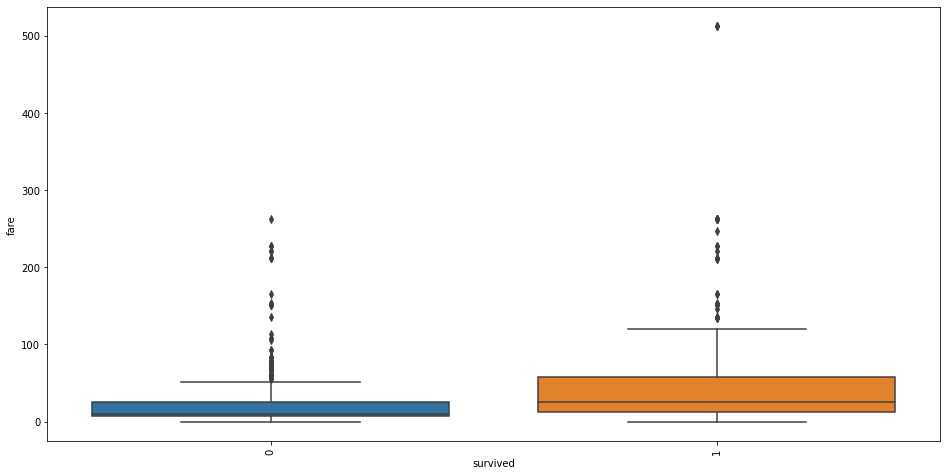

In [89]:
import matplotlib.pyplot as plt
import seaborn as sns

data = pd.concat([titanic['survived'], titanic['fare']], axis=1)
f, ax = plt.subplots(figsize=(16, 8))
fig = sns.boxplot(x=titanic['survived'], y=titanic['fare'], data=data)
plt.xticks(rotation=90);

`data = pd.concat([df['survived'], df['fare']], axis=1)`: This line creates a new DataFrame called data by concatenating two columns from an existing DataFrame df. It selects the 'survived' and 'fare' columns and combines them horizontally (axis=1) to form the new DataFrame.

`f, ax = plt.subplots(figsize=(16, 8))`: This line creates a figure (f) and an axis (ax) using plt.subplots(). The figsize parameter sets the size of the figure in inches, specifying a width of 16 and a height of 8.

`fig = sns.boxplot(x=df['survived'], y=df['fare'], data=data)`: This line creates a box plot using Seaborn's boxplot function. The 'survived' column values are assigned to the x-axis (x=df['survived']), and the 'fare' column values are assigned to the y-axis (y=df['fare']). The data parameter specifies the DataFrame from which the values should be retrieved.

`plt.xticks(rotation=90)`: This line rotates the x-axis tick labels by 90 degrees to prevent overlap when the labels are long. It improves the readability of the plot by ensuring that the x-axis labels are displayed vertically.

In [90]:
titanic[titanic['fare'] > 500]

,passenger_id,pclass,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest,survived
60,50,1,"Cardeza, Mrs. James Warburton Martinez (Charlo...",F,58.0,0,1,PC 17755,512.3292,B51 B53 B55,C,3,NaN,"Germantown, Philadelphia, PA",1
789,183,1,"Lesurer, Mr. Gustave J",M,35.0,0,0,PC 17755,512.3292,B101,C,3,NaN,NaN,1
795,49,1,"Cardeza, Mr. Thomas Drake Martinez",M,36.0,0,1,PC 17755,512.3292,B51 B53 B55,C,3,NaN,"Austria-Hungary / Germantown, Philadelphia, PA",1


In [91]:
# fix the outlier
titanic["fare"].replace({ 512.3292 : 7.25}, inplace=True)

### 1.2.8 Exercise

In [92]:
print(titanic.isnull().sum())

passenger_id      0
pclass            0
name              0
sex               0
age               0
sibsp             0
parch             0
ticket            0
fare              1
cabin           659
embarked          0
boat            542
body            776
home.dest       385
survived          0
dtype: int64


As you continue exploring the fascinating Titanic dataset, you might have noticed that there are still some missing values in certain columns. You may choose two of them to do the data cleaning. Good luck!

In [93]:
# Write your code here

## 1.2 Encoding Categorical Data

Encoding categorical data involves converting categorical variables into numerical representations to be used in machine learning or statistical models. This process assigns numerical values to categories, allowing the data to be processed effectively by algorithms that work with numerical inputs. Common encoding techniques include one-hot encoding, label encoding, ordinal encoding, target encoding, binary encoding, frequency encoding, and hash encoding. By encoding categorical data, we enable the incorporation of these variables into models and leverage the information they provide for analysis and predictions.

There are several ways to encode categorical data, depending on the specific requirements and characteristics of the data. Here are some common methods for categorical data encoding:

One-Hot Encoding (Dummy Coding):

1. This method creates binary columns for each category in the original variable. Each category is represented by a separate column, where a value of 1 indicates the presence of that category, and 0 indicates its absence. This approach is suitable when the categories are not ordinal.
Example: Using **pd.get_dummies()** function in pandas or **OneHotEncoder** class in scikit-learn.
Label Encoding:

2. Label encoding assigns a unique numerical label to each category in the variable. Each category is replaced with an integer value. This method is useful for ordinal categorical variables where the order matters.
Example: Using **LabelEncoder** class in scikit-learn.
Ordinal Encoding:

3. Ordinal encoding maps the categories to ordered numerical values based on a predefined order or mapping. It assigns integers to categories based on their relative order or specified mapping. This encoding is suitable for ordinal categorical variables.
Example: Using a mapping dictionary or the OrdinalEncoder class in scikit-learn.
Binary Encoding:

4. Binary encoding represents each category with binary digits. It converts the categories into binary representations and uses a combination of 0s and 1s to encode the variables. This approach is suitable for variables with a large number of categories.
Example: Using libraries like category_encoders or feature-engine.
Frequency Encoding:

5. Frequency encoding replaces each category with its frequency or proportion in the dataset. It assigns a numerical value based on the occurrence frequency of each category. This approach is useful when the frequency of categories is informative.
Example: Manually calculating frequencies or using libraries like category_encoders.
Hash Encoding:

These are some common methods for encoding categorical data. The choice of encoding technique depends on the specific characteristics of the data, the nature of the categories, and the requirements of the analysis or modeling task.

### 1.2.1 One-Hot Encoding (Dummy Coding)

One-hot encoding converts categorical variables into binary columns representing each unique category, enabling machine learning algorithms to process categorical data as numerical input.

In [94]:
# Create a DataFrame with the "color" column
df = pd.DataFrame({'color': ['red', 'green', 'blue', 'red']})

# Apply one-hot encoding
one_hot_encoded = pd.get_dummies(df['color'])

In [95]:
one_hot_encoded

,blue,green,red
0,0,0,1
1,0,1,0
2,1,0,0
3,0,0,1


The resulting **one_hot_encoded** DataFrame will have three binary columns: "color_red," "color_green," and "color_blue," where 1 indicates the presence of that color and 0 indicates its absence.

### 1.2.2 Label encoding

In [96]:
# Create a DataFrame with the "color" column
label_df = pd.DataFrame({'color': ['red', 'green', 'blue', 'red']})

# Apply label encoding
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
label_df['color_encoded'] = label_encoder.fit_transform(df['color'])

In [97]:
label_df

,color,color_encoded
0,red,2
1,green,1
2,blue,0
3,red,2


The resulting DataFrame will have an additional column named "color_encoded" that contains the encoded numerical values for each category: 2 for "red," 1 for "green," and 0 for "blue."

### 1.2.3 Ordinal encoding

In [98]:
import pandas as pd

# Create a DataFrame with the categorical variable
ordinal_df = pd.DataFrame({'Size': ['Small', 'Medium', 'Large', 'Small', 'Large']})

# Define the order of the categories
category_order = ['Small', 'Medium', 'Large']

# Perform ordinal encoding
ordinal_df['Size_encoded'] = ordinal_df['Size'].map(lambda x: category_order.index(x))

# Print the encoded DataFrame
ordinal_df

,Size,Size_encoded
0,Small,0
1,Medium,1
2,Large,2
3,Small,0
4,Large,2


The map() function in combination with the lambda function allows us to apply the ordinal encoding logic to each value in the 'Size' column and obtain the corresponding encoded values. These encoded values are then assigned to the 'Size_encoded' column in the DataFrame.

Consider a categorical variable "Size" with categories "Small," "Medium," and "Large." After ordinal encoding, "Small" might be represented as 0, "Medium" as 1, and "Large" as 2.

### 1.2.4 Binary encoding

In [99]:
import category_encoders as ce

# Create a DataFrame with the "color" column
df = pd.DataFrame({'color': ['red', 'green', 'blue', 'red']})

# Apply binary encoding
binary_encoder = ce.BinaryEncoder(cols=['color'])
binary_df = binary_encoder.fit_transform(df)

In [100]:
binary_df

,color_0,color_1
0,0,1
1,1,0
2,1,1
3,0,1


The resulting **df_encoded** DataFrame will have binary-encoded columns for the "color" variable.

### 1.2.5 Frequency encoding

In [101]:
# Create a DataFrame with the "color" column
df = pd.DataFrame({'color': ['red', 'green', 'blue', 'red']})

# Calculate the frequency of each category
frequency = df['color'].value_counts(normalize=True)

# Apply frequency encoding
df['color_encoded'] = df['color'].map(frequency)

In [102]:
df

,color,color_encoded
0,red,0.50
1,green,0.25
2,blue,0.25
3,red,0.50


The resulting DataFrame will have an additional column named "color_encoded" that contains the frequency (proportion) of each category.

These examples demonstrate how each encoding method can be applied to a categorical variable. It's important to adapt the code to your specific dataset and encoding requirements.

### 1.2.6 Exercise

In [103]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 849 entries, 0 to 848
Data columns (total 15 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   passenger_id  849 non-null    int64  
 1   pclass        849 non-null    int64  
 2   name          849 non-null    object 
 3   sex           849 non-null    object 
 4   age           849 non-null    float64
 5   sibsp         849 non-null    int64  
 6   parch         849 non-null    int64  
 7   ticket        849 non-null    object 
 8   fare          848 non-null    float64
 9   cabin         190 non-null    object 
 10  embarked      849 non-null    object 
 11  boat          307 non-null    object 
 12  body          73 non-null     float64
 13  home.dest     464 non-null    object 
 14  survived      849 non-null    int64  
dtypes: float64(3), int64(5), object(7)
memory usage: 106.1+ KB


We still have some features that require encoding. Let's pick two of these features and apply the appropriate encoding techniques to convert them into numerical values.

In [104]:
# Write your code here

# 2. Feature Selection

## 2.1 Introduction

### 2.1.1 What is feature selection and why is it important

Feature selection is a process in machine learning and data analysis that involves selecting a subset of relevant and important features (also known as attributes or variables) from a larger set of features in a dataset. The goal of feature selection is to choose the most informative and significant features that have a strong relationship with the target variable or outcome of interest.

In many real-world datasets, there may be numerous features, some of which might be redundant, irrelevant, or even noisy, meaning they do not contribute much to the prediction or analysis task. Including such features in the model can lead to various issues, such as increased computational complexity, overfitting, reduced model interpretability, and degraded model performance on unseen data.

By performing feature selection, we aim to:

**1. Improve Model Performance:** By selecting only the most relevant features, the model can focus on the most important patterns and relationships in the data, leading to better generalization and improved model performance on new, unseen data.

**2. Reduce Overfitting:** Including irrelevant or redundant features in the model can cause overfitting, where the model memorizes the training data but fails to generalize well to new data. Feature selection helps in reducing overfitting and promoting better model generalization.

**3. Enhance Model Interpretability:** Models with a smaller number of features are easier to interpret and understand. Feature selection helps create simpler, more interpretable models, which can provide valuable insights into the underlying relationships between features and the target variable.

**4. Save Computational Resources:** Removing irrelevant features from the dataset reduces the amount of data that needs to be processed during model training and prediction, leading to faster and more efficient computations.

### 2.1.2 Common Feature Selection Methods

Feature selection is a crucial step in data science that involves choosing the most relevant and informative features from a dataset to improve the performance of a machine learning model and reduce overfitting. There are various methods for feature selection, each with its advantages and use cases. Here are some common methods:

### 1. Univariate Feature Selection (SelectKBest):
Univariate feature selection is a statistical method that ranks each feature based on its individual relationship with the target variable. SelectKBest is one such technique that selects the top K features with the highest scores from a given statistical test. In our case, we use the F-test as the score function. The chosen features are those that show the strongest correlation with the target variable in isolation.


### 2. Recursive Feature Elimination (RFE):
Recursive Feature Elimination (RFE) is a recursive method that starts with all features and iteratively removes the least important feature at each step. It uses an underlying model (in our case, a linear regression model) to evaluate feature importance and eliminates the least significant feature based on its coefficient value. RFE continues this process until it reaches the desired number of features.


### 3. Random Forest Feature Importance:
Random Forest is an ensemble learning method that builds multiple decision trees and combines their predictions. Feature importance is calculated based on the average impurity reduction (or information gain) from each feature across all trees. Features with higher importance scores are considered more relevant to the target variable. In this method, we select the top features based on their importance scores without using any threshold.


### 4. SelectPercentile:
SelectPercentile is another univariate feature selection method that selects the top features based on a user-defined percentile of the highest-scoring features. In our case, we use the F-test score function to rank features based on their correlation with the target variable. The features that have importance scores above the specified percentile are chosen.


## 2.2 Load and Introduce the Dataset

In [105]:
import pandas as pd
from sklearn.datasets import fetch_california_housing
from sklearn.datasets import fetch_california_housing
from sklearn.feature_selection import SelectKBest, f_regression
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.feature_selection import SelectPercentile
from sklearn.model_selection import train_test_split

In [106]:
# Load the California housing dataset
data = fetch_california_housing(as_frame=True)
df = data.frame

In [107]:
df.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


The California housing dataset is a popular dataset often used for regression tasks in machine learning and data analysis. It contains data from the 1990 California census and provides various features related to housing in different districts of California. The target variable in this dataset is typically the median house value for California districts.

The dataset includes the following features:

1. **MedInc:** Median income of the district.
2. **HouseAge:** Median age of the houses in the district.
3. **AveRooms:** Average number of rooms in the houses in the district.
4. **AveBedrms:** Average number of bedrooms in the houses in the district.
5. **Population:** Total population of the district.
6. **AveOccup:** Average household occupancy, i.e., the number of people living in a household in the district.
7. **Latitude:** Latitude coordinate of the district's location.
8. **Longitude:** Longitude coordinate of the district's location.


The target variable is:

9. **MedHouseVal:** Median house value for California districts (the target variable for regression).

In [108]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   MedInc       20640 non-null  float64
 1   HouseAge     20640 non-null  float64
 2   AveRooms     20640 non-null  float64
 3   AveBedrms    20640 non-null  float64
 4   Population   20640 non-null  float64
 5   AveOccup     20640 non-null  float64
 6   Latitude     20640 non-null  float64
 7   Longitude    20640 non-null  float64
 8   MedHouseVal  20640 non-null  float64
dtypes: float64(9)
memory usage: 1.4 MB


In [109]:
# Split the data into features (X) and target variable (y)
X = df.drop('MedHouseVal', axis=1)
y = df['MedHouseVal']

## 2.3 Feature Selection Methods

#### 2.3.1 Univariate Feature Selection (SelectKBest)

In [110]:
# 1. Univariate Feature Selection (SelectKBest)
k_best_features = 5  # Choose the desired number of top features
selector_univariate = SelectKBest(score_func=f_regression, k=k_best_features)
X_new_univariate = selector_univariate.fit_transform(X, y)
selected_features_univariate = X.columns[selector_univariate.get_support()]
print("Selected features using Univariate Feature Selection (SelectKBest):")
print(selected_features_univariate)

Selected features using Univariate Feature Selection (SelectKBest):
Index(['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Latitude'], dtype='object')


1. k_best_features = 5: This line sets the variable k_best_features to 5, which means we want to select the top 5 best features from the dataset.

2. selector_univariate = SelectKBest(score_func=f_regression, k=k_best_features): Here, we create an instance of the SelectKBest class. The score_func parameter is set to f_regression, which means the method will use the F-test to determine the relationship between each feature and the target variable. The k parameter is set to k_best_features, indicating that we want to select the top 5 features.

3. X_new_univariate = selector_univariate.fit_transform(X, y): This line fits the SelectKBest instance to the input data X and target variable y. It then transforms the original dataset X into a new dataset X_new_univariate, containing only the selected top 5 features based on the F-test scores.

4. selected_features_univariate = X.columns[selector_univariate.get_support()]: After performing feature selection, this line retrieves the names of the selected features from the original dataset X using the get_support() method of the SelectKBest instance. This method returns a boolean mask that indicates which features were selected (True) and which were not selected (False). We use this mask to extract the names of the selected features from the X.columns.

In [111]:
# 1. Univariate Feature Selection (SelectKBest)
k_best_features = 5  # Choose the desired number of top features
# Compute feature scores using univariate regression (F-test)
scores_univariate = f_regression(X, y)[0]
# Get the indices of the top K features
selected_indices_univariate = sorted(
    range(len(scores_univariate)),
    key=lambda i: scores_univariate[i], reverse=True)[:k_best_features]
selected_features_univariate = X.columns[selected_indices_univariate]
print("Selected features using Univariate Feature Selection (SelectKBest):")
print(selected_features_univariate)


Selected features using Univariate Feature Selection (SelectKBest):
Index(['MedInc', 'AveRooms', 'Latitude', 'HouseAge', 'AveBedrms'], dtype='object')


1. k_best_features = 5: As before, this line sets the variable k_best_features to 5, indicating that we want to select the top 5 best features.

2. scores_univariate = f_regression(X, y)[0]: This line computes the F-test scores for each feature in the input dataset X with respect to the target variable y. The f_regression function is used for this purpose, and [0] is used to extract the F-test scores from the function's result. The F-test measures the correlation between each feature and the target variable, helping us identify the most relevant features.

3. selected_indices_univariate = sorted(range(len(scores_univariate)), key=lambda i: scores_univariate[i], reverse=True)[:k_best_features]: This line calculates the indices of the top K features based on their F-test scores. It sorts the indices in descending order of their corresponding scores and selects the top k_best_features indices using Python slicing.

4. selected_features_univariate = X.columns[selected_indices_univariate]: After obtaining the indices of the top features, this line extracts the names of these features from the original dataset X using the selected_indices_univariate variable. It retrieves the corresponding columns from the X DataFrame to get the selected feature names.

In [112]:
df_univariate = pd.DataFrame(data=df, columns=selected_features_univariate)
df_univariate.head()

,MedInc,AveRooms,Latitude,HouseAge,AveBedrms
0,8.3252,6.984127,37.88,41.0,1.023810
1,8.3014,6.238137,37.86,21.0,0.971880
2,7.2574,8.288136,37.85,52.0,1.073446
3,5.6431,5.817352,37.85,52.0,1.073059
4,3.8462,6.281853,37.85,52.0,1.081081


#### 2.3.2 Recursive Feature Elimination (RFE)

In [113]:
num_features_to_select = 5  # Choose the desired number of features
estimator_rfe = LinearRegression()
selector_rfe = RFE(estimator_rfe, n_features_to_select=num_features_to_select)
X_new_rfe = selector_rfe.fit_transform(X, y)
selected_features_rfe = X.columns[selector_rfe.support_]
print("\nSelected features using Recursive Feature Elimination (RFE):")
print(selected_features_rfe)



Selected features using Recursive Feature Elimination (RFE):
Index(['MedInc', 'AveRooms', 'AveBedrms', 'Latitude', 'Longitude'], dtype='object')


1. num_features_to_select = 5: This line sets the variable num_features_to_select to 5, indicating that we want to select the top 5 best features.

2. estimator_rfe = LinearRegression(): Here, we create an instance of the LinearRegression class, which will be used as the estimator to rank and select features. The RFE algorithm will repeatedly fit the estimator to the data and remove the least important features based on the coefficients obtained from the estimator.

3. selector_rfe = RFE(estimator_rfe, n_features_to_select=num_features_to_select): This line creates an instance of the RFE class and passes the estimator_rfe (i.e., the LinearRegression instance) as the estimator. The n_features_to_select parameter is set to num_features_to_select, indicating the number of features to be selected.

4. X_new_rfe = selector_rfe.fit_transform(X, y): The fit_transform method is called on the selector_rfe instance to perform the RFE feature selection. It fits the estimator to the input dataset X and target variable y, and then transforms the original dataset X into a new dataset X_new_rfe, containing only the selected top 5 features.

5. selected_features_rfe = X.columns[selector_rfe.support_]: After the RFE process, this line retrieves the names of the selected features from the original dataset X using the selector_rfe.support_ attribute. The selector_rfe.support_ attribute is a boolean mask that indicates which features were selected (True) and which were not selected (False). We use this mask to extract the names of the selected features from the X.columns.

In [114]:
# 2. Recursive Feature Elimination (RFE)
num_features_to_select = 5  # Choose the desired number of features
# Create a linear regression model
estimator_rfe = LinearRegression()
# RFE: Start with all features, recursively remove the least important one until reaching the desired number of features
selected_indices_rfe = list(range(len(X.columns)))
while len(selected_indices_rfe) > num_features_to_select:
    X_train, X_test, y_train, y_test = train_test_split(X.iloc[:, selected_indices_rfe], y, test_size=0.3, random_state=42)
    estimator_rfe.fit(X_train, y_train)
    # Get the feature importances (coefficients) from the model
    feature_importances_rfe = estimator_rfe.coef_
    # Find the index of the least important feature and remove it
    min_importance_index = None
    min_importance_value = float('inf')
    for i, importance in enumerate(feature_importances_rfe):
        if abs(importance) < min_importance_value:
            min_importance_index = i
            min_importance_value = abs(importance)
    selected_indices_rfe.pop(min_importance_index)
selected_features_rfe = X.columns[selected_indices_rfe]
print("\nSelected features using Recursive Feature Elimination (RFE):")
print(selected_features_rfe)



Selected features using Recursive Feature Elimination (RFE):
Index(['MedInc', 'AveRooms', 'AveBedrms', 'Latitude', 'Longitude'], dtype='object')


1. num_features_to_select = 5: As before, this line sets the variable num_features_to_select to 5, indicating that we want to select the top 5 best features.

2. estimator_rfe = LinearRegression(): Here, we create an instance of the LinearRegression class, which will be used as the estimator to rank and select features, just like in the previous example.

3. selected_indices_rfe = list(range(len(X.columns))): This line creates a list selected_indices_rfe containing the indices of all features in the input dataset X. At the beginning, all features are considered for selection.

4. while len(selected_indices_rfe) > num_features_to_select:: The code enters a while loop that continues until the number of selected indices becomes equal to num_features_to_select. Inside the loop, the RFE process will be performed.

5. The loop starts by splitting the data into training and testing sets using train_test_split on the selected indices. This is done to evaluate the importance of each feature.

6. estimator_rfe.fit(X_train, y_train): The LinearRegression estimator is fitted to the training data X_train and y_train.

7. feature_importances_rfe = estimator_rfe.coef_: The coefficients (feature importances) of the LinearRegression model are obtained using estimator_rfe.coef_.

8. The loop iterates through the feature_importances_rfe array to find the index of the least important feature. The feature with the smallest absolute coefficient value is considered the least important.

10. selected_indices_rfe.pop(min_importance_index): The index of the least important feature is removed from the selected_indices_rfe list.

11. The loop repeats the process (fitting, evaluating feature importances, removing least important feature) until the desired number of selected features (num_features_to_select) is reached.

12. After the loop ends, the selected feature names are extracted from the original dataset X using the selected_indices_rfe list.

In [115]:
df_rfe = pd.DataFrame(data=df, columns=selected_features_rfe)
df_rfe.head()

,MedInc,AveRooms,AveBedrms,Latitude,Longitude
0,8.3252,6.984127,1.023810,37.88,-122.23
1,8.3014,6.238137,0.971880,37.86,-122.22
2,7.2574,8.288136,1.073446,37.85,-122.24
3,5.6431,5.817352,1.073059,37.85,-122.25
4,3.8462,6.281853,1.081081,37.85,-122.25


#### 2.3.3 Random Forest Feature Importance with Threshold

In [116]:
threshold_importance = 0.05  # Choose the desired importance threshold
estimator_rf = RandomForestRegressor()
estimator_rf.fit(X, y)
importances = estimator_rf.feature_importances_
selected_features_rf = X.columns[importances > threshold_importance]
print("\nSelected features using Random Forest Feature Importance with Threshold:")
print(selected_features_rf)


Selected features using Random Forest Feature Importance with Threshold:
Index(['MedInc', 'HouseAge', 'AveOccup', 'Latitude', 'Longitude'], dtype='object')


1. threshold_importance = 0.05: This line sets the variable threshold_importance to 0.05, indicating the minimum importance threshold. Features with an importance greater than this threshold will be selected.

2. estimator_rf = RandomForestRegressor(): Here, we create an instance of the RandomForestRegressor class, which will be used to fit the random forest model to the data and calculate feature importances.

3. estimator_rf.fit(X, y): The random forest model is fitted to the input dataset X and target variable y.

4. importances = estimator_rf.feature_importances_: The feature importances obtained from the trained random forest model are stored in the importances variable. These importances represent the relative importance of each feature in predicting the target variable.

5. selected_features_rf = X.columns[importances > threshold_importance]: This line filters the features based on their importances. It creates a boolean mask where each entry indicates whether the feature importance is greater than the threshold_importance or not. Using this mask, it extracts the names of the features that meet the importance threshold from the original dataset X.columns.

In [117]:
# 3. Random Forest Feature Importance with Threshold
threshold_importance = 0.05  # Choose the desired importance threshold
# Create a random forest model
estimator_rf = RandomForestRegressor()
estimator_rf.fit(X, y)
# Get the feature importances from the model
importances_rf = estimator_rf.feature_importances_
# Find the indices of the features that have importance scores above the threshold
selected_indices_rf = []
for i, importance in enumerate(importances_rf):
    if importance > threshold_importance:
        selected_indices_rf.append(i)
selected_features_rf = X.columns[selected_indices_rf]
print("\nSelected features using Random Forest Feature Importance with Threshold:")
print(selected_features_rf)


Selected features using Random Forest Feature Importance with Threshold:
Index(['MedInc', 'HouseAge', 'AveOccup', 'Latitude', 'Longitude'], dtype='object')


1. threshold_importance = 0.05: As before, this line sets the variable threshold_importance to 0.05, indicating the minimum importance threshold. Features with an importance greater than this threshold will be selected.

2. estimator_rf = RandomForestRegressor(): Here, we create an instance of the RandomForestRegressor class, which will be used to fit the random forest model to the data and calculate feature importances.

3. estimator_rf.fit(X, y): The random forest model is fitted to the input dataset X and target variable y.

4. importances_rf = estimator_rf.feature_importances_: The feature importances obtained from the trained random forest model are stored in the importances_rf variable. These importances represent the relative importance of each feature in predicting the target variable.

5. selected_indices_rf = []: This line initializes an empty list selected_indices_rf to store the indices of the features that meet the importance threshold.

6. The loop iterates through the importances_rf array using enumerate, where i represents the index of the feature, and importance represents the corresponding feature importance.

7. if importance > threshold_importance:: The code checks if the importance of the current feature is greater than the specified threshold_importance.

8. If the feature meets the importance threshold, its index (i) is appended to the selected_indices_rf list.

9. After the loop ends, the selected_indices_rf list contains the indices of the features that have importance scores above the threshold.

10. selected_features_rf = X.columns[selected_indices_rf]: This line retrieves the names of the selected features from the original dataset X using the selected_indices_rf list.

In [118]:
df_rf = pd.DataFrame(data=df, columns=selected_features_rf)
df_rf.head()

,MedInc,HouseAge,AveOccup,Latitude,Longitude
0,8.3252,41.0,2.555556,37.88,-122.23
1,8.3014,21.0,2.109842,37.86,-122.22
2,7.2574,52.0,2.802260,37.85,-122.24
3,5.6431,52.0,2.547945,37.85,-122.25
4,3.8462,52.0,2.181467,37.85,-122.25


#### 2.3.4 SelectPercentile

In [119]:
percentile_features = 50  # Choose the desired percentile of features to keep
selector_percentile = SelectPercentile(score_func=f_regression, percentile=percentile_features)
X_new_percentile = selector_percentile.fit_transform(X, y)
selected_features_percentile = X.columns[selector_percentile.get_support()]
print("\nSelected features using SelectPercentile:")
print(selected_features_percentile)


Selected features using SelectPercentile:
Index(['MedInc', 'HouseAge', 'AveRooms', 'Latitude'], dtype='object')


1. percentile_features = 50: This line sets the variable percentile_features to 50, indicating that we want to keep the top 50% of features based on their statistical significance.

2. selector_percentile = SelectPercentile(score_func=f_regression, percentile=percentile_features): This line creates an instance of the SelectPercentile class. It uses the f_regression score function, which calculates the F-test scores between each feature and the target variable. The percentile parameter is set to percentile_features, indicating the desired percentile of features to keep.

3. X_new_percentile = selector_percentile.fit_transform(X, y): The fit_transform method is called on the selector_percentile instance to perform the feature selection. It fits the SelectPercentile instance to the input dataset X and target variable y, and then transforms the original dataset X into a new dataset X_new_percentile, containing only the selected top features based on their statistical significance.

4. selected_features_percentile = X.columns[selector_percentile.get_support()]: After performing feature selection, this line retrieves the names of the selected features from the original dataset X using the selector_percentile.get_support() method. This method returns a boolean mask that indicates which features were selected (True) and which were not selected (False). We use this mask to extract the names of the selected features from the X.columns.

In [120]:
# 4. SelectPercentile
percentile_features = 50  # Choose the desired percentile of features to keep
# Compute feature scores using univariate regression (F-test)
scores_percentile = f_regression(X, y)[0]
# Find the importance score threshold for the desired percentile
importance_threshold = np.percentile(scores_percentile, percentile_features)
# Find the indices of the features that have importance scores above the threshold
selected_indices_percentile = []
for i, score in enumerate(scores_percentile):
    if score >= importance_threshold:
        selected_indices_percentile.append(i)
selected_features_percentile = X.columns[selected_indices_percentile]
print("\nSelected features using SelectPercentile:")
print(selected_features_percentile)



Selected features using SelectPercentile:
Index(['MedInc', 'HouseAge', 'AveRooms', 'Latitude'], dtype='object')


1. percentile_features = 50: As before, this line sets the variable percentile_features to 50, indicating that we want to keep the top 50% of features based on their statistical significance.

2. scores_percentile = f_regression(X, y)[0]: This line computes the F-test scores for each feature in the input dataset X with respect to the target variable y. The f_regression function is used for this purpose, and [0] is used to extract the F-test scores from the function's result. The F-test measures the correlation between each feature and the target variable, helping us identify the most relevant features.

3. importance_threshold = np.percentile(scores_percentile, percentile_features): This line calculates the importance score threshold that corresponds to the desired percentile. It uses the np.percentile function from NumPy to find the value at percentile_features percentile in the scores_percentile array.

4. selected_indices_percentile = []: This line initializes an empty list selected_indices_percentile to store the indices of the features that have importance scores above the calculated threshold.

5. The loop iterates through the scores_percentile array using enumerate, where i represents the index of the feature, and score represents the corresponding F-test score.

6. if score >= importance_threshold:: The code checks if the F-test score of the current feature is greater than or equal to the calculated importance_threshold.

7. If the feature meets the importance threshold, its index (i) is appended to the selected_indices_percentile list.

8. After the loop ends, the selected_indices_percentile list contains the indices of the features that have importance scores above the threshold.

9. selected_features_percentile = X.columns[selected_indices_percentile]: This line retrieves the names of the selected features from the original dataset X using the selected_indices_percentile list.

In [121]:
df_percentile = pd.DataFrame(data=df, columns=selected_features_percentile)
df_percentile.head()

,MedInc,HouseAge,AveRooms,Latitude
0,8.3252,41.0,6.984127,37.88
1,8.3014,21.0,6.238137,37.86
2,7.2574,52.0,8.288136,37.85
3,5.6431,52.0,5.817352,37.85
4,3.8462,52.0,6.281853,37.85


## 2.4 Performance Comparison

Here, we choose decision tree as the model.

In [122]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

def decision_tree_func(df, y = data.target):
    # Separate features and target
    X = df  # Features

    # Split the data into train and test sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

    # Create a decision tree regressor
    tree = DecisionTreeRegressor()

    # Fit the model on the training data
    tree.fit(X_train, y_train)

    # Predict on the test data
    y_pred = tree.predict(X_test)

    # Calculate the mean squared error (MSE)
    mse = mean_squared_error(y_test, y_pred)

    # Calculate the mean absolute error (MAE)
    mae = mean_absolute_error(y_test, y_pred)

    # Calculate the R-squared (coefficient of determination)
    r2 = r2_score(y_test, y_pred)

    # Print the predicted values, MSE, MAE, and R-squared
    print("Mean Squared Error:", mse)
    print("Mean Absolute Error:", mae)
    print("R-squared:", r2)

    return r2

In [123]:
# List of feature selection methods
feature_selection_methods = [
    "Univariate Feature Selection (SelectKBest)",
    "Recursive Feature Elimination (RFE)",
    "Random Forest Feature Importance with Threshold",
    "SelectPercentile"
]

In [124]:
df_list =  [df_univariate, df_rfe, df_rf, df_percentile]

In [125]:
accuracy_dict = {}

for i in range(len(df_list)):
    print(feature_selection_methods[i] + ":")
    
    accuracy_dict.update({feature_selection_methods[i]:decision_tree_func(df_list[i])})
    print()
    

Univariate Feature Selection (SelectKBest):
Mean Squared Error: 0.8507950330086239
Mean Absolute Error: 0.63388371124031
R-squared: 0.34752725612036495

Recursive Feature Elimination (RFE):
Mean Squared Error: 0.44905180960726737
Mean Absolute Error: 0.4256104360465116
R-squared: 0.6556232053653758

Random Forest Feature Importance with Threshold:
Mean Squared Error: 0.523841449975218
Mean Absolute Error: 0.4551108938953488
R-squared: 0.5982672030717502

SelectPercentile:
Mean Squared Error: 0.8854762924951549
Mean Absolute Error: 0.6379457364341085
R-squared: 0.3209302783989998



In [126]:
accuracy_dict

{'Univariate Feature Selection (SelectKBest)': 0.34752725612036495,
 'Recursive Feature Elimination (RFE)': 0.6556232053653758,
 'Random Forest Feature Importance with Threshold': 0.5982672030717502,
 'SelectPercentile': 0.3209302783989998}

In [127]:
finalleaderboard = pd.DataFrame.from_dict(accuracy_dict, orient='index', columns=['Accuracy'])
finalleaderboard = finalleaderboard.sort_values('Accuracy', ascending=False)
finalleaderboard

,Accuracy
Recursive Feature Elimination (RFE),0.655623
Random Forest Feature Importance with Threshold,0.598267
Univariate Feature Selection (SelectKBest),0.347527
SelectPercentile,0.320930


## 2.5 Exercise

Please choose one of the method before and perform the feature selection. Good luck!

In [128]:
from sklearn.datasets import load_iris

# Load the Iris dataset
data = load_iris()

# Get the feature matrix (X) and target array (y)
X = data.data
y = data.target

# 3. Evaluation Metrics

## 3.1 Introduction
In data science, evaluation metrics are used to measure the performance and effectiveness of various machine learning models and algorithms. The choice of evaluation metrics depends on the specific problem being solved and the nature of the data. Here are some commonly used evaluation metrics in data science:

**1. Accuracy:** Measures the proportion of correctly predicted instances to the total number of instances in the dataset. It is a straightforward metric but can be misleading in imbalanced datasets.

**2. Precision:** The proportion of true positive predictions (correctly predicted positive instances) to the total number of positive predictions made by the model. It is useful when the cost of false positives is high.

**3. Recall (Sensitivity or True Positive Rate):** The proportion of true positive predictions to the total number of actual positive instances in the dataset. It is valuable when the cost of false negatives is high.

**4. F1 Score:** The harmonic mean of precision and recall. It provides a balance between precision and recall, especially in imbalanced datasets.

**5. Specificity (True Negative Rate):** The proportion of true negative predictions to the total number of actual negative instances in the dataset. It is useful when the cost of false negatives is high.

**6. ROC-AUC (Receiver Operating Characteristic - Area Under the Curve):** Evaluates the area under the ROC curve, which plots the true positive rate against the false positive rate at various classification thresholds. It provides an aggregate measure of a model's performance across various thresholds.

**7. Confusion Matrix:** A table that presents the true positive, true negative, false positive, and false negative counts, allowing for a more detailed evaluation of a classifier's performance.

**8. Mean Absolute Error (MAE):** Measures the average absolute difference between the actual and predicted values. It is commonly used for regression tasks.

**9. Mean Squared Error (MSE):** Measures the average squared difference between the actual and predicted values. It is another popular metric for regression tasks.

**10. Root Mean Squared Error (RMSE):** The square root of MSE, providing a more interpretable metric for regression tasks.

**11. R-squared (R2):** Measures the proportion of variance in the dependent variable that is predictable from the independent variables. It represents the goodness of fit of a regression mode

## 3.2 Implementation

### 3.2.1 Import Libraries

In [129]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_curve, roc_auc_score

**Imports**: Here, we import the necessary libraries for our code. `numpy` and `pandas` are used for data manipulation, `matplotlib` for data visualization, `load_iris` from `sklearn.datasets` to load the Iris dataset, `train_test_split` from `sklearn.model_selection` to split the data, `LogisticRegression` from `sklearn.linear_model` for the classification model, and various evaluation metrics (`confusion_matrix`, `classification_report`, `roc_curve`, `roc_auc_score`) from sklearn.metrics.

### 3.2.2 Load and Introduce the Wine dataset

In [130]:
from sklearn.datasets import load_wine
wine = load_wine()
X, y = wine.data, wine.target

# Create a DataFrame
wine_df = pd.DataFrame(data=X, columns=wine.feature_names)
wine_df['target'] = y

# Display the first few rows of the DataFrame
wine_df.head()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,target
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0,0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0,0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0,0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0,0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0,0


**Dataset: Wine Dataset**

**Source:** UCI Machine Learning Repository

**Description:** The Wine dataset contains the results of a chemical analysis of wines grown in the same region in Italy, but from three different cultivars. The goal of this dataset is to classify wines into their respective classes based on their chemical attributes.

**Features:**

1. **Alcohol:** The alcohol content in the wine.
2. **Malic Acid:** The amount of malic acid present in the wine.
3. **Ash:** The ash content of the wine.
4. **Alcalinity of Ash:** The level of alkalinity in the ash.
5. **Magnesium:** The magnesium content in the wine.
6. **Total Phenols:** The total phenolic content in the wine.
7. **Flavanoids:** The amount of flavonoid compounds present in the wine.
8. **Nonflavanoid Phenols:** The amount of non-flavonoid phenolic compounds.
9. **Proanthocyanins:** The level of proanthocyanidins in the wine.
10. **Color Intensity:** The color intensity of the wine.
11. **Hue:** The hue or color shade of the wine.
12. **OD280/OD315 of Diluted Wines:** The optical density at 280/315 nm, indicating color intensity.
13. **Proline:** The amount of proline, an amino acid, in the wine.

**Target Variable:**

**target:** This feature represents the class or cultivar of the wine. It can take on three different values: 0, 1, or 2, corresponding to the three different cultivars.
This dataset is commonly used for classification tasks in machine learning, where the goal is to predict the cultivar of a wine based on its chemical attributes. Each of the features contributes to the characterization of the wine's composition and can have an impact on its classification.

### 3.2.3 Data Splitting

In [131]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

**Data Splitting**: The `train_test_split()` function is used to split the data into training and testing sets. We specify `test_size=0.3`, which means 30% of the data will be used for testing, and the remaining 70% for training. The `random_state` parameter is set to 42 to ensure reproducibility of the split.

### 3.2.4 Model Training

In [132]:
# Create and train a logistic regression model
model = LogisticRegression()
model.fit(X_train, y_train)


LogisticRegression()

**Model Training**: We create an instance of the logistic regression model using `LogisticRegression()`. Then, we fit the model to the training data using `model.fit(X_train, y_train)`.

### 3.2.5 Model Prediction

In [133]:
# Make predictions on the test set
y_pred = model.predict(X_test)


**Model Prediction**: We use the trained model to make predictions on the test set using `model.predict(X_test)`.

### 3.2.6 Evaluation Metrics

In [134]:
# Calculate evaluation metrics

accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

accuracy

0.9814814814814815

**Evaluation Metrics**: Here, we calculate the evaluation metrics for our classification model. We calculate the accuracy, which is the proportion of correct predictions. We use `np.mean(y_pred == y_test)` to calculate accuracy, where `y_pred` are the model predictions and `y_test` are the true labels. We also compute the confusion matrix using `confusion_matrix(y_test, y_pred)`, and the classification report using `classification_report(y_test, y_pred)`.

### 3.2.7 Data Visualization - Confusion Matrix

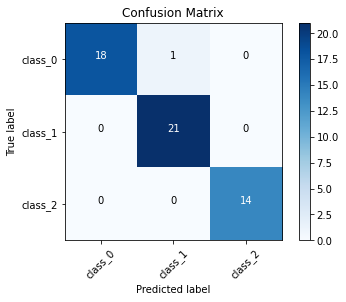

In [135]:
import matplotlib.pyplot as plt
import numpy as np

# Assuming you already have the 'conf_matrix' and 'wine.target_names' variables defined

plt.figure(figsize=(6, 4))
plt.imshow(conf_matrix, interpolation='nearest', cmap=plt.cm.Blues)

classes = wine.target_names  # Define 'classes' before using it in the loop

# Add numbers to the Confusion Matrix cells
for i in range(len(classes)):
    for j in range(len(classes)):
        plt.text(j, i, str(conf_matrix[i, j]),
                 horizontalalignment="center", color="white" if i == j else "black")

plt.title('Confusion Matrix')
plt.colorbar()
tick_marks = np.arange(len(classes))
plt.xticks(tick_marks, classes, rotation=45)
plt.yticks(tick_marks, classes)
plt.ylabel('True label')
plt.xlabel('Predicted label')

plt.show()


**Data Visualization** - Confusion Matrix: We use matplotlib to create a heatmap to visualize the confusion matrix. The heatmap's intensity represents the number of correct and incorrect predictions for each class. The color bar indicates the scale of the values.

### 3.2.8 Classification Report:

In [136]:
# Classification Report
print("Classification Report:")
print(classification_rep)


Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.95      0.97        19
           1       0.95      1.00      0.98        21
           2       1.00      1.00      1.00        14

    accuracy                           0.98        54
   macro avg       0.98      0.98      0.98        54
weighted avg       0.98      0.98      0.98        54



**Classification Report**: We print the classification report, which includes metrics like precision, recall, F1-score, and support for each class.

## 3.3 Exercise


Please choose the feature you selected above, train the features with SVM classifier, and apply two evaluation metrics to it.

In [138]:
from sklearn.svm import SVC  # Import the SVC class
from sklearn.datasets import load_iris

iris = load_iris()
iris_df = pd.DataFrame(data=iris.data, columns=iris.feature_names)
iris_df["target"] = iris.target

# Create the SVM classifier
svm_classifier = SVC()

# Train the SVM classifier on the training data
svm_classifier.fit(X_train, y_train)

# Make predictions on the test data
y_pred = svm_classifier.predict(X_test)